In [24]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as matimg
import tensorflow as tf
import pandas as pd
import numpy as np
import pathlib
import cv2
import os

In [25]:
import kagglehub

path = kagglehub.dataset_download("muratkokludataset/rice-image-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/muratkokludataset/rice-image-dataset/versions/1


In [26]:
path = pathlib.Path(path)
path = os.path.join(path, 'Rice_Image_Dataset')
path = pathlib.Path(path)

In [27]:
arborio   = list(path.glob('Arborio/*'))[:100]
basmati   = list(path.glob('Basmati/*'))[:100]
ipsala    = list(path.glob('Ipsala/*'))[:100]
jasmine   = list(path.glob('Jasmine/*'))[:100]
karacadag = list(path.glob('Karacadag/*'))[:100]

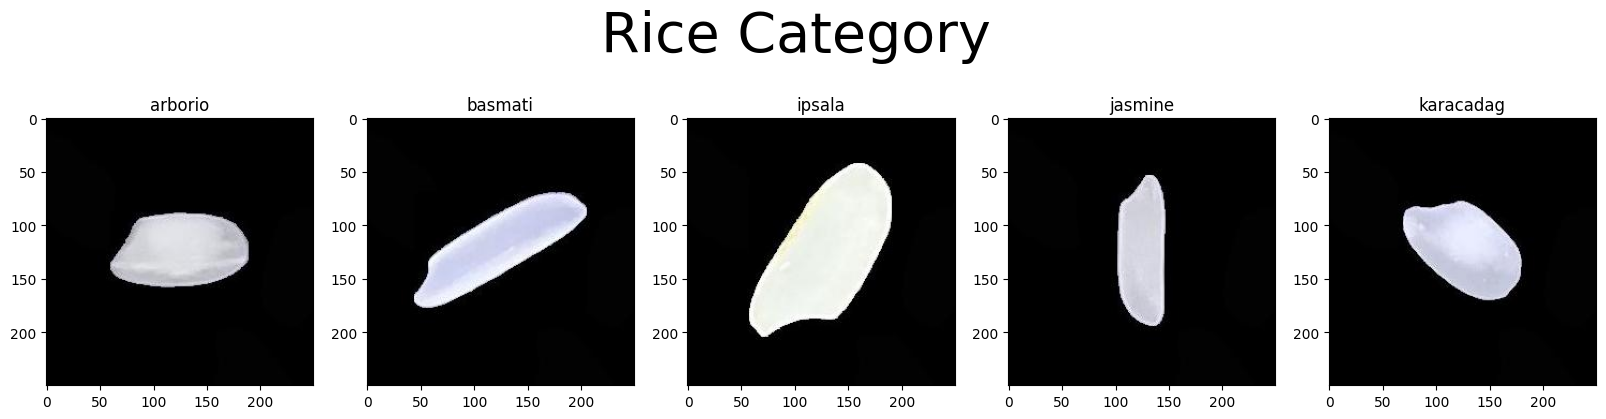

In [28]:
# Check if lists are not empty before accessing elements
arborio_img = matimg.imread(arborio[0]) if arborio else None
basmati_img = matimg.imread(basmati[0]) if basmati else None
ipsala_img = matimg.imread(ipsala[0]) if ipsala else None
jasmine_img = matimg.imread(jasmine[0]) if jasmine else None
karacadag_img = matimg.imread(karacadag[0]) if karacadag else None

fig,ax = plt.subplots(ncols=5, figsize=(20,5))
fig.suptitle ('Rice Category', fontsize=40)

ax[0].set_title("arborio")
ax[1].set_title("basmati")
ax[2].set_title("ipsala")
ax[3].set_title("jasmine")
ax[4].set_title("karacadag")

# Display images only if they exist
if arborio_img is not None:
    ax[0].imshow(arborio_img)
if basmati_img is not None:
    ax[1].imshow(basmati_img)
if ipsala_img is not None:
    ax[2].imshow(ipsala_img)
if jasmine_img is not None:
    ax[3].imshow(jasmine_img)
if karacadag_img is not None:
    ax[4].imshow(karacadag_img)

plt.show()

In [29]:
data_images = {
    'arborio' : arborio,
    'basmati' : basmati,
    'ipsala' : ipsala,
    'jasmine' : jasmine,
    'karacadag': karacadag
}

# numerical labels for the categories
data_labels = {
    'arborio' : 0,
    'basmati' : 1,
    'ipsala' : 2,
    'jasmine' : 3,
    'karacadag': 4
}

In [30]:
X, y = [], [] # X = images, y = labels
for label, images in data_images.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img, (224, 224)) # Resizing the images to be able to pass on MobileNetv2 model
    X.append(resized_img)
    y.append(data_labels[label])


X = np.array(X)
X = X/255
y = np.array(y)

In [31]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val)

In [32]:
X,y=[],[]
for label,images in df_images.items():
    for image in images:
        img_data=cv2.imread(str(image))
        resized_img=cv2.resize(img_data,(224,224))
        X.append(resized_img)
        y.append(df_labels[label])

NameError: name 'df_images' is not defined

In [ ]:
X=np.array(X)
X=X/255
y=np.array(y)

In [ ]:
X_train,X_test_val,y_train,y_test_val=train_test_split(X,y)
X_test,X_val,y_test,y_val=train_test_split(X_test_val,y_test_val)

In [ ]:
fig,ax=plt.subplots(ncols=5,figsize=(20,5))
fig.suptitle('Rice Category')

# Load images using the correct paths from the lists
arborio_image = matimg.imread(arborio[0]) if arborio else None
basmati_image = matimg.imread(basmati[0]) if basmati else None
ipsala_image = matimg.imread(ipsala[0]) if ipsala else None
jasmine_image = matimg.imread(jasmine[0]) if jasmine else None
karacadag_image = matimg.imread(karacadag[0]) if karacadag else None

ax[0].set_title('Arborio')
ax[1].set_title('Basmati')
ax[2].set_title('Ipsala')
ax[3].set_title('Jasmine')
ax[4].set_title('Karacadag')

# Display images only if they exist
if arborio_image is not None:
    ax[0].imshow(arborio_image)
if basmati_image is not None:
    ax[1].imshow(basmati_image)
if ipsala_image is not None:
    ax[2].imshow(ipsala_image)
if jasmine_image is not None:
    ax[3].imshow(jasmine_image)
if karacadag_image is not None:
    ax[4].imshow(karacadag_image)

In [ ]:
base_model = tf.keras.applications.MobileNetV2(weights="imagenet",
                       include_top=False,
                       input_shape=(224, 224, 3))

In [ ]:
base_model.summary()

In [ ]:
top_model = tf.keras.models.Sequential()
top_model.add(tf.keras.layers.Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(tf.keras.layers.Dense(32, activation="relu"))
top_model.add(tf.keras.layers.Dense(10, activation="softmax"))

top_model.summary()

In [ ]:
transfer_model = tf.keras.models.Sequential()
transfer_model.add(base_model)
transfer_model.add(top_model)

transfer_model.layers[0].trainable = False
transfer_model.summary()

transfer_model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])


history = transfer_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

In [ ]:
history=model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=10)

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'lower right')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper right')
plt.show()

In [ ]:
pd.DataFrame(history.history).plot()
plt.title('Model Accuracy/Loss')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
plt.show()

In [ ]:
transfer_model.evaluate(X_test, y_test)

In [ ]:
for i,j in df_labels.items():
    if pred==j:
        print(i)

In [ ]:
transfer_model.save('rice_classification.h5')

In [ ]:
model.save("rice.h5")